# MNIST CNN

You should already have gone through the `GettingStartedSequentialModels` notebook -- if not you'll be lost here!

In [1]:
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


We're going to use some examples from [https://github.com/fchollet/keras/tree/master/examples](https://github.com/fchollet/keras/tree/master/examples).
There are tons more and you should check them out!
We'll use these examples to learn about some different sorts of layers, and strategies for our activation functions, loss functions, optimizers, etc.

## Simple Deep NN on the MNIST Dataset

This examples is from [https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py).
We'll learn about some simple convolutional layers!

In [2]:
import keras
from keras.datasets import mnist # load up the training data!
from keras.models import Sequential # our model
from keras.layers import Dense, Dropout, Flatten # layers we've seen
from keras.layers import Conv2D, MaxPooling2D # new layers
from keras import backend as K # see later

Typically it's good practice to specify your parameters together

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

In this case we already know something about the shape of the input data!
Let's load it in

In [4]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Keras has many different backends that can be used (we're using `TensorFlow`).
One of the subtle differences mentioned is the shape of the input data.
The `backend` module which we imported `as K` lets the code know which format we're using and re-shapes accordingly.
Good to keep in mind for later if you're having bugs with this

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

As before we'll set our data to be `float32` and rescale

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


And yet again we're going to do the same thing with our $y$ labels

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

OK now we're going to define a model with some new layers

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

The `Conv2D` and `MaxPooling2D` layers are new.
Let's think about what they're doing:
![conv layer](https://image.slidesharecdn.com/2016-05-16keti1cnns-160527034528/95/deep-convolutional-neural-networks-overview-11-638.jpg?cb=1464320746)
We'll see more next week so don't stress if it's unclear!
In a nutshell: see [Convolutional](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/convolution_layer.html) and [Pooling](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/pooling_layer.html) layers.
A max pooling is just a re-sampling (spatial coarsening) layer which uses the max rather than the mean.

In [10]:
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

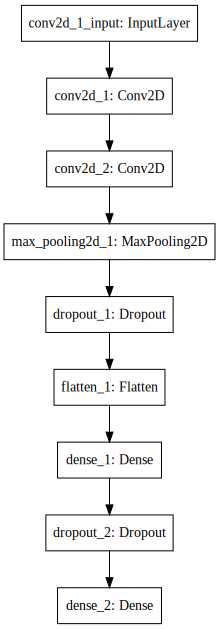

In [11]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Now we'll compile as before.
Here the loss function and optimizer are specified differently -- both ways are fine.
We're using a new optimizer; it's a good idea to look up the different loss functions and optimizers if you have the time.

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
metrics=['accuracy'])

Now fit the model

In [13]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 209s - loss: 0.3363 - acc: 0.8971 - val_loss: 0.0771 - val_acc: 0.9742
Epoch 2/12
60000/60000 [==============================] - 303s - loss: 0.1186 - acc: 0.9659 - val_loss: 0.0510 - val_acc: 0.9836
Epoch 3/12
60000/60000 [==============================] - 210s - loss: 0.0882 - acc: 0.9737 - val_loss: 0.0450 - val_acc: 0.9845
Epoch 4/12
60000/60000 [==============================] - 191s - loss: 0.0731 - acc: 0.9783 - val_loss: 0.0419 - val_acc: 0.9858
Epoch 5/12
60000/60000 [==============================] - 188s - loss: 0.0644 - acc: 0.9809 - val_loss: 0.0394 - val_acc: 0.9861
Epoch 6/12
60000/60000 [==============================] - 188s - loss: 0.0581 - acc: 0.9826 - val_loss: 0.0361 - val_acc: 0.9869
Epoch 7/12
60000/60000 [==============================] - 188s - loss: 0.0539 - acc: 0.9836 - val_loss: 0.0348 - val_acc: 0.9884
Epoch 8/12
60000/60000 [=======================

Why was that so much slower?
A lot more parameters!

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________